### 1. State space model
The *state space model* of a system is derived from the system's governing differential equations. To formulate the system as a *state space model*, the system needs to be converted into a structure on where the system's input and output variables have a **first order, linear relation**. In mathematical form, the *state space model* takes the following form: 
$$\dot{x} = Ax + Bu $$
$$y = Cx + Du $$ 

## Simulation example
#### Pendulum simulation 
The motion of a pendulum is governed by the equation: $ \dot{\theta} = -\frac{g}{l}sin(\theta)$

To explore the motion of a pendulum from differential equation form, the *state space model* must first be derived. To derive *state space model*, start by setting the following variables:
$\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} \theta \\ \dot{\theta} \end{bmatrix}$

##### Undamped pendulum system
then the for the **undamped system**, the *state space model* will take the following form: 
$$\frac{d}{dt} (\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_2 \\ -\frac{g}{l}sin(x_1) \end{bmatrix} $$

With parameters, g: gravity = 9.8  and l: length of pendulum = 1, the followin code block is yielded. 

In [10]:
from scipy import signal
import numpy as np
import matplotlib.pylab as plt
import simulation_helpers.ode45 as ode45
%matplotlib inline


g = 9.8
damp = 0
l = 2
m = 10
k = 1
N = 101
x0 = np.array([0, 1])
t = np.linspace(0, 10, N)

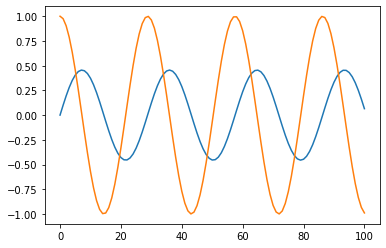

In [6]:
# define function for state space model
def f(t, y, b, g, l):
    """
    Pendulum example function.
    """
    theta = y[0]
    omega = y[1]
    # state space model; to be abstracted out of function
    dydt = [omega, -(g/l)*np.sin(theta)]
    return np.array(dydt)

# simulate pendulum time domain; get angular frequency
x = ode45.ode45(f, t, x0, damp, g, l)


plt.plot(x)
plt.show()

##### Damped pendulum system
then the for the **damped system**, the *state space model* will take the following form: 
$$\frac{d}{dt} (\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_2 \\ -\frac{g}{l}sin(x_1) -\frac{k}{ml}x_2 \end{bmatrix} $$



With parameters, g: gravity = 9.8  and l: length of pendulum = 1, m = mass of pendulum ball, k = coeffecient of frictional pivot the followin code block is yielded. 

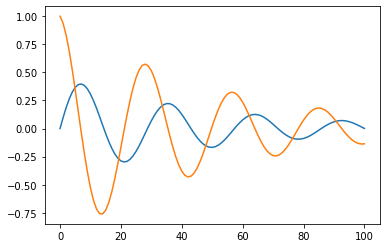

In [14]:
# set the damping parameter; increasing will cause pendulum 
k = 2
# define function for state space model
def f(t, y, b, g, l, m, k):
    """
    Pendulum example function.
    """
    theta = y[0]
    omega = y[1]
    # state space model; to be abstracted out of function
    dydt = [omega, -(g/l)*np.sin(theta) - (k/m*l)*omega]
    return np.array(dydt)

# simulate pendulum time domain; get angular frequency
x = ode45.ode45(f, t, x0, damp, g, l, m, k)


plt.plot(x)
plt.show()